In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Question 1:
We only have two assets and they follow a normal distribution.

The **covariance matrix** is:

\begin{bmatrix}
0.02 & 0.005 \\
0.005 & 0.01
\end{bmatrix}

The **mean return vector** is:

\begin{bmatrix}
0.05 \\
0.03
\end{bmatrix}


In [ ]:
covariance_matrix = np.array([[0.02, 0.005],
                               [0.005, 0.01]])
covariance_matrix

array([[0.02 , 0.005],
       [0.005, 0.01 ]])

In [ ]:
mean_return_vector = np.array([0.05, 0.03])
mean_return_vector

array([0.05, 0.03])

In [ ]:
Q = covariance_matrix

it is assumed that asset returns follow a multivariate normal distribution. So DAM(x) = sqrt(2/pi) * SD(x)

R ~ N(mu, Q) \
R(x) = x1 * R1 + x2 * R2\
E(R(x)) = mu * x\
V(R(x)) = xQx = sigma²\
L(x) = -R(x)\
L ~ N(-mu*x, sigma²)

VaRα(x): value-at-risk of L(x), with α = 0.95:\
VaRα(x) = -mu * x +  zα * sigma = -mu * x +  zα * sqrt(xQx)


In [ ]:
mu = mean_return_vector

In [ ]:
from scipy.stats import norm
alpha = 0.95
z_alpha = norm.ppf(alpha)
z_alpha

1.6448536269514722

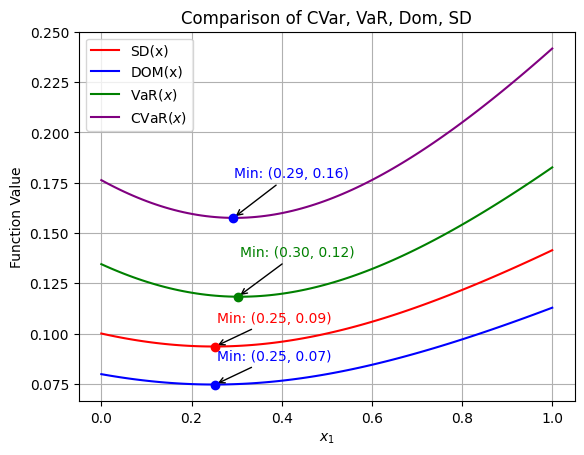

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.95
z_alpha = norm.ppf(alpha)
x1_values = np.linspace(0, 1, 100)

# 1st curve : sqrt(x^T Q x) * sqrt(2/pi) (Dam value)
y_dam_values = []
for x1 in x1_values:
    x = np.array([x1, 1 - x1])
    y = np.sqrt(np.dot(x.T, np.dot(Q, x))) * np.sqrt(2 / np.pi)  # Calcul of sqrt(x^T Q x) * sqrt(2/pi)
    y_dam_values.append(y)

min_y_dam = min(y_dam_values)
min_x1_dam = x1_values[y_dam_values.index(min_y_dam)]

# 2nd curve : sqrt(x^T Q x) (SD value)
y_sd_values = []
for x1 in x1_values:
    x = np.array([x1, 1 - x1])
    y = np.sqrt(np.dot(x.T, np.dot(Q, x)))  # Calcul of sqrt(x^T Q x)
    y_sd_values.append(y)

min_y_sd = min(y_sd_values)
min_x1_sd = x1_values[y_sd_values.index(min_y_sd)]

# 3rd curve : VaR(x) = -mu*x + z_alpha * sqrt(x^T Q x)
y_VaR_values = []
for x1 in x1_values:
    x = np.array([x1, 1 - x1])
    y = -np.dot(mu, x) + z_alpha * np.sqrt(np.dot(x.T, np.dot(Q, x)))
    y_VaR_values.append(y)

min_y_VaR = min(y_VaR_values)
min_x1_VaR = x1_values[y_VaR_values.index(min_y_VaR)]

# 4th curve
# -mu*x + sqrt(x^T Q x)/(sqrt(2pi)*(1-alpha)) * exp(-0.5*(Zalpha²))
y_CVaR_values = []

for x1 in x1_values:
    x = np.array([x1, 1 - x1])

    y = -np.dot(mu, x) + np.sqrt(np.dot(x.T, np.dot(Q, x))) * np.exp(-z_alpha**2 / 2) / (np.sqrt(2 * np.pi)*(1-alpha))
    y_CVaR_values.append(y)

min_y_CVaR = min(y_CVaR_values)
min_x1_CVaR = x1_values[y_CVaR_values.index(min_y_CVaR)]

plt.plot(x1_values, y_sd_values, label=r'SD(x)', color='red')
plt.plot(x1_values, y_dam_values, label=r'DOM(x)', color='blue')
plt.plot(x1_values, y_VaR_values, label=r'VaR$(x)$', color='green')
plt.plot(x1_values, y_CVaR_values, label=r'CVaR$(x)$', color='purple')

plt.scatter(min_x1_sd, min_y_sd, color='red', zorder=5)
plt.scatter(min_x1_dam, min_y_dam, color='blue', zorder=5)
plt.scatter(min_x1_VaR, min_y_VaR, color='green', zorder=5)
plt.scatter(min_x1_CVaR, min_y_CVaR, color='blue', zorder=5)

plt.annotate(f'Min: ({min_x1_sd:.2f}, {min_y_sd:.2f})',
             xy=(min_x1_sd, min_y_sd),
             xytext=(min_x1_sd + 0.005, min_y_sd + 0.012),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             color='red', fontsize=10)

plt.annotate(f'Min: ({min_x1_dam:.2f}, {min_y_dam:.2f})',
             xy=(min_x1_dam, min_y_dam),
             xytext=(min_x1_dam + 0.005, min_y_dam + 0.012),
             arrowprops=dict(facecolor='blue', arrowstyle='->'),
             color='blue', fontsize=10)

plt.annotate(f'Min: ({min_x1_VaR:.2f}, {min_y_VaR:.2f})',
             xy=(min_x1_VaR, min_y_VaR),
             xytext=(min_x1_VaR + 0.005, min_y_VaR + 0.02),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             color='green', fontsize=10)

plt.annotate(f'Min: ({min_x1_CVaR:.2f}, {min_y_CVaR:.2f})',
             xy=(min_x1_CVaR, min_y_CVaR),
             xytext=(min_x1_CVaR + 0.0005, min_y_CVaR + 0.02),
             arrowprops=dict(facecolor='purple', arrowstyle='->'),
             color='blue', fontsize=10)

plt.title(r'Comparison of CVar, VaR, Dom, SD')
plt.xlabel('$x_1$')
plt.ylabel('Function Value')
plt.grid(True)
plt.legend()
plt.show()









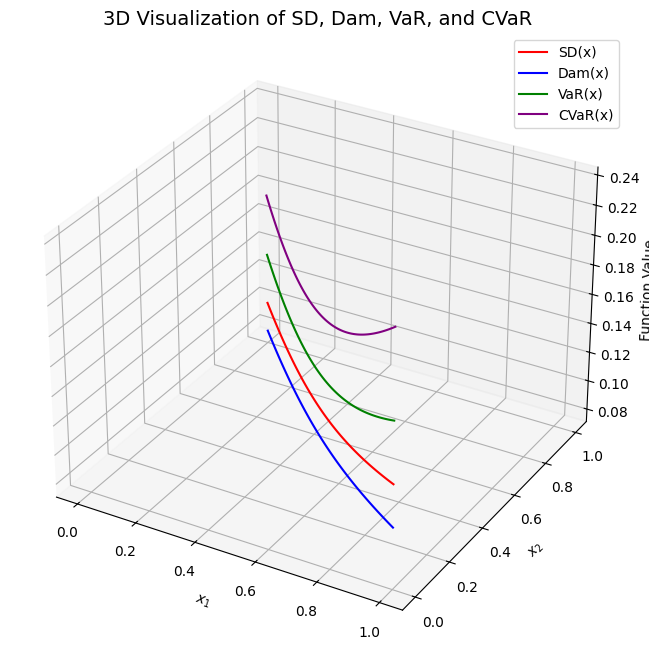

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.95
z_alpha = norm.ppf(alpha)
mu = mean_return_vector
Q = covariance_matrix

x1_values = np.linspace(0, 1, 100)
x2_values = 1 - x1_values  # x2 = 1 - x1 (contrainte x1 + x2 = 1)

SD_values = []
Dam_values = []
VaR_values = []
CVaR_values = []

for x1, x2 in zip(x1_values, x2_values):
    x = np.array([x1, x2])
    sd = np.sqrt(np.dot(x.T, np.dot(Q, x)))
    dam = sd * np.sqrt(2 / np.pi)
    var = -np.dot(mu, x) + z_alpha * sd
    cvar = -np.dot(mu, x) + sd * np.exp(-z_alpha**2 / 2) / (np.sqrt(2 * np.pi) * (1 - alpha))

    SD_values.append(sd)
    Dam_values.append(dam)
    VaR_values.append(var)
    CVaR_values.append(cvar)

# Graphique 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_values, x2_values, SD_values, label='SD(x)', color='red')
ax.plot(x1_values, x2_values, Dam_values, label='Dam(x)', color='blue')
ax.plot(x1_values, x2_values, VaR_values, label='VaR(x)', color='green')
ax.plot(x1_values, x2_values, CVaR_values, label='CVaR(x)', color='purple')

# axes names
ax.set_title("3D Visualization of SD, Dam, VaR, and CVaR", fontsize=14)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("Function Value")

ax.legend()
plt.show()


Extra:
# With 3 assets, x1 + x2 + x3 = 1, xi >= 0



The **covariance matrix** is:


\begin{bmatrix}
0.04 & 0.02 & 0.01 \\
0.02 & 0.03 & 0.015 \\
0.01 & 0.015 & 0.02
\end{bmatrix}


The **mean return vector** is:


\begin{bmatrix}
0.08 \\
0.05 \\
0.03
\end{bmatrix}



In [ ]:
mu = np.array([0.08, 0.05, 0.03])


In [ ]:
Q = np.array([
    [0.04, 0.02, 0.01],
    [0.02, 0.03, 0.015],
    [0.01, 0.015, 0.02]
])

In [ ]:
def three_dimension_graph(mu, Q, risk_measure_name):
  # generate x1 and x2
  x1_values = np.linspace(0, 1, 50)
  x2_values = np.linspace(0, 1, 50)

  x1, x2 = np.meshgrid(x1_values, x2_values)

  # Calcul x3 for x1 + x2 + x3 = 1
  x3 = 1 - x1 - x2
  x3[x3 < 0] = np.nan

  SD_values = np.empty_like(x1)
  Dam_values = np.empty_like(x1)
  VaR_values = np.empty_like(x1)
  CVaR_values = np.empty_like(x1)

  for i in range(x1.shape[0]):
      for j in range(x1.shape[1]):
          if not np.isnan(x3[i, j]):
              x = np.array([x1[i, j], x2[i, j], x3[i, j]])
              sd = np.sqrt(np.dot(x.T, np.dot(Q, x)))
              dam = sd * np.sqrt(2 / np.pi)
              var = -np.dot(mu, x) + z_alpha * sd
              cvar = -np.dot(mu, x) + sd * np.exp(-z_alpha**2 / 2) / (np.sqrt(2 * np.pi) * (1 - alpha))

              SD_values[i, j] = sd
              Dam_values[i, j] = dam
              VaR_values[i, j] = var
              CVaR_values[i, j] = cvar
          else:
              SD_values[i, j] = np.nan
              Dam_values[i, j] = np.nan
              VaR_values[i, j] = np.nan
              CVaR_values[i, j] = np.nan
  if risk_measure_name == "SD":
    risk_measures = {"name": "SD", "value": SD_values}
  elif risk_measure_name == "DAM":
    risk_measures = {"name": "DAM", "value": Dam_values}
  elif risk_measure_name == "VaR":
    risk_measures = {"name": "VaR", "value": VaR_values}
  elif risk_measure_name == "CVaR":
    risk_measures = {"name": "CVaR", "value": CVaR_values}
  else:
    raise ValueError("Invalid risk measure name. Choose from 'SD', 'DAM', 'VaR', or 'CVaR'.")

  min_index = np.unravel_index(np.nanargmin(risk_measures["value"]), risk_measures["value"].shape)  # Indice du minimum
  min_x1 = x1[min_index]
  min_x2 = x2[min_index]
  min_risk_measure = risk_measures["value"][min_index]  # Valeur minimale

  # 3D graph
  fig = plt.figure(figsize=(16, 10))
  ax = fig.add_subplot(111, projection='3d')

  # Print the surface
  surf = ax.plot_surface(x1, x2, risk_measures["value"], cmap='viridis', alpha=0.8, label=f'{risk_measures["name"]}(x)')

  ax.scatter(min_x1, min_x2, min_risk_measure, color='red', s=100, label='Minimum', zorder=5)  # Marqueur rouge
  ax.text(min_x1, min_x2, min_risk_measure,
          f"Min: ({min_x1:.2f}, {min_x2:.2f}, {min_risk_measure:.2f})",
          color='red', fontsize=10, zorder=5)

  ax.set_title(f'3D Visualization of {risk_measures["name"]}(x) for Three Assets', fontsize=14)
  ax.set_xlabel("$x_1$")
  ax.set_ylabel("$x_2$")
  ax.set_zlabel(f'Function Value {risk_measures["name"]}(x)')

  ax.legend()
  plt.show()


  fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

  ax.legend()
  plt.show()


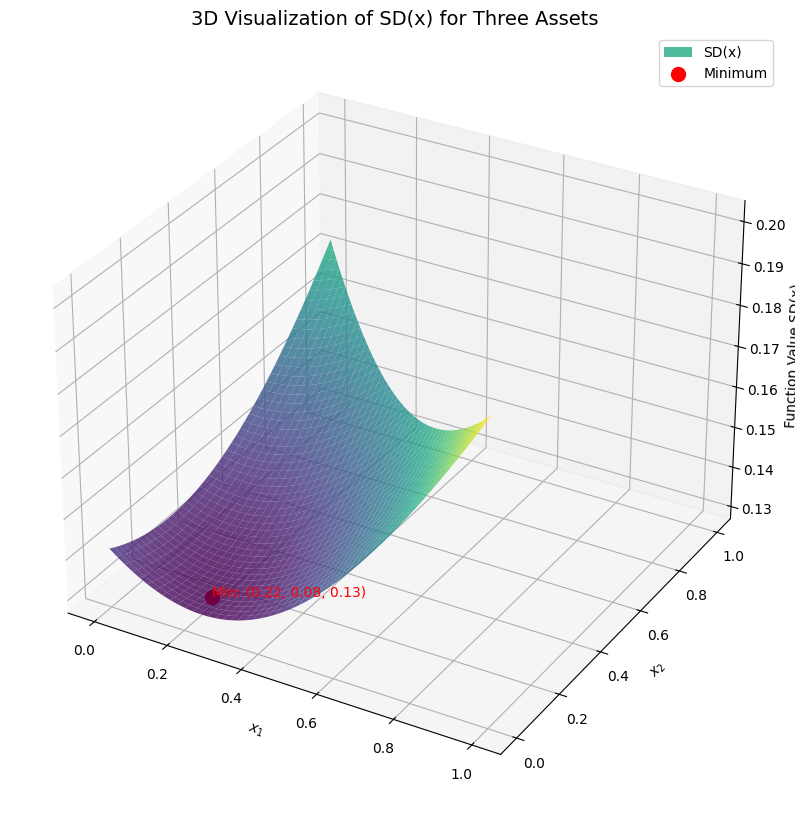

In [ ]:
three_dimension_graph(mu, Q, "SD")

### Question 2
We have two assets with a discret distribution.

|       | R2 = -1 | R2 = 3  |
|-------|---------|---------|
| R1 = -2 | 0.01    | 0.03    |
| R1 = 1  | 0.02    | 0.94    |


$$
\mathbb{E}(R1) = 0.88
$$

$$
\mathbb{E}(R2) = 2.88
$$

$$
L(x) =-x_1R_1 - x_2R_2
$$

$$
\mathbb{E}(L(x)) = 2.88-3.76x_1
$$




Calcul de V(L(x))


$$
V(L(x)) = \mathbb{E}(L(x)-L(x)²)
$$


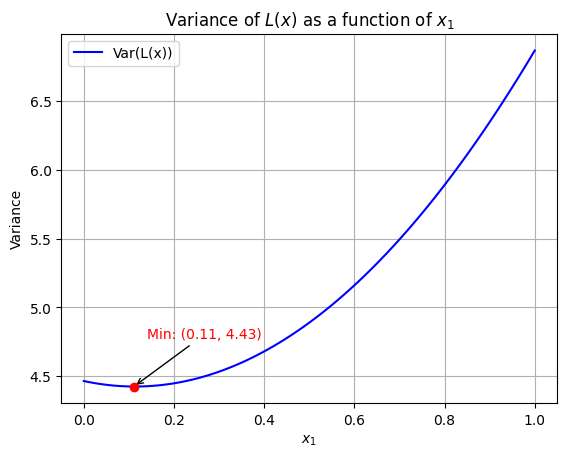

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the variance as a function of x1
def variance_Lx(x1):
    return (4.46*x1 - 1.88)**2 * 0.01 + (8.76*x1 - 5.88)**2 * 0.03 + (1.76*x1 - 1.88)**2 * 0.02 + (-0.76*x1 - 1.88)**2 * 0.94

x1_values = np.linspace(0, 1, 100)
variance_values = variance_Lx(x1_values)

min_index = np.argmin(variance_values)
min_x1 = x1_values[min_index]
min_variance = variance_values[min_index]

plt.plot(x1_values, variance_values, label=r'Var(L(x))', color='b')

plt.scatter(min_x1, min_variance, color='red', zorder=5)
plt.annotate(f'Min: ({min_x1:.2f}, {min_variance:.2f})',
             xy=(min_x1, min_variance),
             xytext=(min_x1 + 0.03, min_variance + 0.35),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             color='red', fontsize=10)

plt.title('Variance of $L(x)$ as a function of $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('Variance')
plt.grid(True)
plt.legend()
plt.show()



Calcul fait en classe(exercice 5.5):
$$
\text{VaR}_\alpha(L(x)) =
\begin{cases}
5x_1 - 3 & \text{pour } 0 \leq x_1 < \frac{4}{7} \\
1 - 2x_1 & \text{pour } \frac{4}{7} \leq x_1 \leq 1
\end{cases}
$$


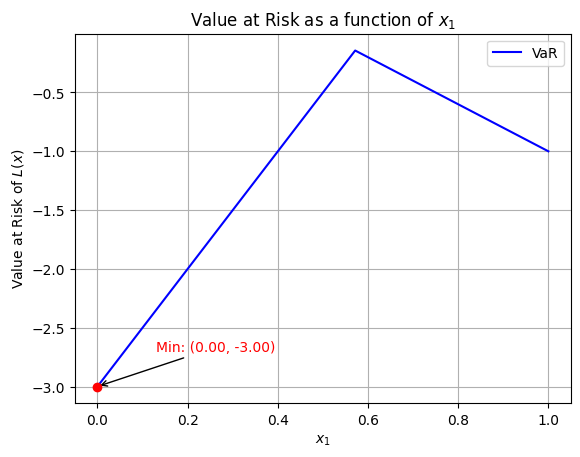

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def var_Lx(x1):
    if x1 < 4/7:
        return 5 * x1 - 3
    else:
        return 1 - 2 * x1

x1_values = np.linspace(0, 1, 1000)
var_values = np.array([var_Lx(x) for x in x1_values])

min_index = np.argmin(var_values)
min_x1 = x1_values[min_index]
min_var = var_values[min_index]

plt.plot(x1_values, var_values, label=r'VaR', color='b')

plt.scatter(min_x1, min_var, color='red', zorder=5)
plt.annotate(f'Min: ({min_x1:.2f}, {min_var:.2f})',
             xy=(min_x1, min_var),
             xytext=(min_x1 + 0.13, min_var + 0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             color='red', fontsize=10)

plt.title('Value at Risk as a function of $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('Value at Risk of $L(x)$')
plt.grid(True)
plt.legend()
plt.show()


$$
\text{CVaR}_\alpha(L(x)) =
\begin{cases}
1.4x_1 - 0.6 & \text{pour } 0 \leq x_1 < \frac{4}{7} \\
2.8x_1​−1.4 & \text{pour } \frac{4}{7} \leq x_1 \leq 1
\end{cases}
$$


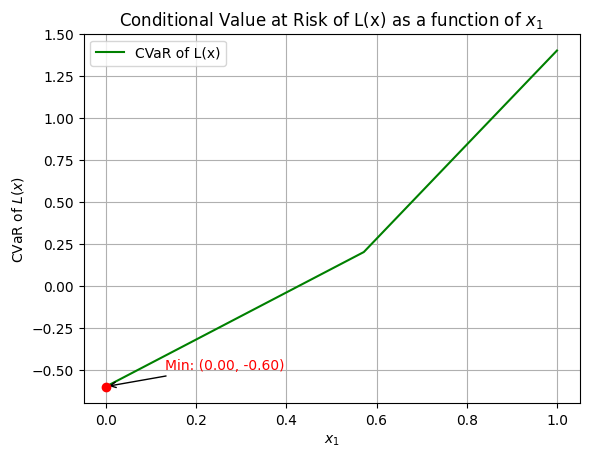

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CVaR function as a piecewise function
def cvar_Lx(x1):
    if x1 < 4/7:
        return 1.4 * x1 - 0.6
    else:
        return 2.8 * x1 - 1.4

x1_values = np.linspace(0, 1, 1000)

cvar_values = np.array([cvar_Lx(x) for x in x1_values])

min_index = np.argmin(cvar_values)
min_x1 = x1_values[min_index]
min_cvar = cvar_values[min_index]

# Create the plot
plt.plot(x1_values, cvar_values, label=r'CVaR of L(x)', color='g')

plt.scatter(min_x1, min_cvar, color='red', zorder=5)
plt.annotate(f'Min: ({min_x1:.2f}, {min_cvar:.2f})',
             xy=(min_x1, min_cvar),
             xytext=(min_x1 + 0.13, min_cvar + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             color='red', fontsize=10)

plt.title('Conditional Value at Risk of L(x) as a function of $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('CVaR of $L(x)$')
plt.grid(True)
plt.legend()
plt.show()


### Question 3

In [ ]:
df = pd.read_csv('Base_dados_USA_2020-2023.csv', sep=';')
def get_data(df, begin_year, end_year):
  #define first line as column name
  df.columns = df.iloc[0]
  # delete first line of the df
  df = df[1:]
  df = df.set_index('Date')
  df = df.astype(float)
  log_returns = np.log(df / df.shift(1))
  log_returns = log_returns.dropna()
  log_returns.index = pd.to_datetime(log_returns.index, format="%d/%m/%Y")
  log_returns_in_sample = log_returns[(log_returns.index.year >= begin_year) & (log_returns.index.year <= end_year)]
  covariance_matrix = log_returns_in_sample.cov()
  mean_returns = log_returns_in_sample.mean()
  return log_returns_in_sample, covariance_matrix, mean_returns

returns, covariance, mean_returns = get_data(df, 2020, 2022)



In [ ]:
# Give std and return of the portfolio composed with weights on a period "period"
def portfolio_performance(weights, mean_returns, cov_matrix, period):
    mean_return_pt = np.sum(mean_returns*weights ) * period
    std_return_pt = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(period)
    return std_return_pt, mean_return_pt

In [ ]:
std_pt, returns_pt = portfolio_performance(np.array(10 * [0.1]), mean_returns, covariance, returns.shape[0])

In [ ]:
#test the function
print(round(returns_pt*100, 2), round(std_pt*100,2))

12.16 39.6


In [ ]:
# negative bc scipy has good minimization function
# the first parameter is the parameter we try to optimize, important to do that for scipy function
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, period, risk_free_rate = 0):
    portfolio_std, portfolio_return = portfolio_performance(weights, mean_returns, cov_matrix, period)
    return -(portfolio_return - risk_free_rate) / portfolio_std

In [ ]:
import scipy as sc

In [ ]:
def max_sharpe_ratio(mean_returns, cov_matrix, period, risk_free_rate = 0, constraint_set = (0,1)):
    number_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, period, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraint_set
    bounds = tuple(bound for asset in range(number_assets))
    #number_assets*[1./number_assets] equal allocation for the first guess
    result = sc.optimize.minimize(negative_sharpe_ratio, number_assets*[1./number_assets], args=args,
                                  method='SLSQP', bounds=bounds, constraints=constraints)
    return result


In [ ]:
result = max_sharpe_ratio(mean_returns, covariance, returns.shape[0])

In [ ]:
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.1784830523708079
       x: [ 4.792e-01  0.000e+00  0.000e+00  0.000e+00  5.708e-16
            5.803e-16  5.208e-01  9.181e-16  0.000e+00  0.000e+00]
     nit: 7
     jac: [-1.760e-04  9.451e-03  1.688e+00  2.660e+00  7.802e-01
            3.783e-01  1.620e-04  8.105e-02  7.093e-01  9.162e-01]
    nfev: 77
    njev: 7


In [ ]:
  portfolio_performance(result.x, mean_returns, covariance, returns.shape[0])

(0.351331332136801, 0.4140380206900794)

In [ ]:
negative_sharpe_ratio(np.array(result.x), mean_returns, covariance, returns.shape[0], risk_free_rate = 0)



-1.1784830523708079

Find portfolio with the minimum variance

In [ ]:
def minimize_variance(cov_matrix, period, constraint_set=(0, 1)):
    number_assets = len(cov_matrix)
    args = ()

    # Constraint: Sum of the weights = 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Constraints on the weights (0 <= weight <= 1)
    bounds = tuple(constraint_set for _ in range(number_assets))

    # Objective function: Portfolio variance over a period T
    def portfolio_variance(weights):
        #return np.dot(weights.T, np.dot(cov_matrix, weights))
        return np.dot(weights.T, np.dot(cov_matrix, weights)) * period

    # Solving the optimization problem
    result = sc.optimize.minimize(portfolio_variance, number_assets * [1. / number_assets],
                                  method='SLSQP', bounds=bounds, constraints=constraints)
    return result



In [ ]:
result_min_variance = minimize_variance(covariance, returns.shape[0])
result_min_variance

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.08510153301900791
       x: [ 0.000e+00  6.506e-19  0.000e+00  4.648e-02  1.319e-02
            6.811e-02  6.310e-01  1.510e-01  9.015e-02  0.000e+00]
     nit: 12
     jac: [ 1.777e-01  1.748e-01  1.726e-01  1.703e-01  1.700e-01
            1.703e-01  1.702e-01  1.704e-01  1.702e-01  1.795e-01]
    nfev: 132
    njev: 12

Find Porfolio with minimum DAM mean average deviation

In [ ]:
def dam_portfolio(weights, returns, mean_returns, period):
        portfolio_returns = np.dot(returns, weights)
        portfolio_mean_return = np.dot(mean_returns, weights) * period
        return np.mean(np.abs(portfolio_returns - portfolio_mean_return))

def minimize_dam(returns, mean_returns, period, constraint_set=(0, 1)):
    number_assets = returns.shape[1]
    args = (returns, mean_returns, period)

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    bounds = tuple(constraint_set for _ in range(number_assets))

    result = sc.optimize.minimize(dam_portfolio, number_assets * [1. / number_assets],
                                  args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


In [ ]:
minimize_dam(returns, mean_returns, returns.shape[0])

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.019184309046098476
       x: [ 1.046e-17  4.800e-18  6.313e-02  2.406e-01  4.921e-02
            7.459e-18  4.074e-01  9.116e-02  9.056e-02  5.792e-02]
     nit: 27
     jac: [ 3.458e-02  2.947e-02  2.009e-02  2.222e-02  1.865e-02
            2.669e-02  1.764e-02  1.822e-02  1.914e-02  1.850e-02]
    nfev: 306
    njev: 27

In [ ]:
def VaR_portfolio(weights, mean_returns, cov_matrix, period, alpha):
        z_alpha = norm.ppf(alpha)
        portfolio_std, portfolio_mean_return = portfolio_performance(weights, mean_returns, cov_matrix, period)
        return -portfolio_mean_return + z_alpha * portfolio_std

def minimize_VaR(returns, mean_returns, cov_matrix, period, alpha=0.95, constraint_set=(0, 1)):
    number_assets = returns.shape[1]
    args = (mean_returns, cov_matrix, period, alpha)

    # sum = 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # (0 <= weight <= 1)
    bounds = tuple(constraint_set for _ in range(number_assets))

    # Résolution du problème
    result = sc.optimize.minimize(VaR_portfolio, number_assets * [1. / number_assets],
                                  args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
minimize_VaR(returns, mean_returns, covariance, returns.shape[0])

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.15718321790382933
       x: [ 3.474e-01  2.911e-02  2.489e-16  0.000e+00  4.868e-17
            0.000e+00  6.083e-01  1.522e-02  0.000e+00  1.338e-16]
     nit: 8
     jac: [ 1.567e-01  1.568e-01  7.327e-01  1.041e+00  3.911e-01
            2.546e-01  1.575e-01  1.575e-01  3.699e-01  4.419e-01]
    nfev: 88
    njev: 8

In [ ]:
# Fonction objectif : CVaR
def CVaR_portfolio(weights, mean_returns, cov_matrix, period, alpha):
    portfolio_std, portfolio_mean_return = portfolio_performance(weights, mean_returns, cov_matrix, period)
    return -portfolio_mean_return + portfolio_std/(1-alpha) * 1/np.sqrt(2*np.pi) * np.exp(-(z_alpha**2)/2)

def minimize_cvar(returns, mean_returns, cov_matrix, period, constraint_set=(0, 1)):
    number_assets = returns.shape[1]
    alpha = 0.95

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    bounds = tuple(constraint_set for _ in range(number_assets))
    args = (mean_returns, cov_matrix, period, alpha)

    result = sc.optimize.minimize(CVaR_portfolio, number_assets * [1. / number_assets],
                                  args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


In [ ]:
minimize_cvar(returns, mean_returns, covariance, returns.shape[0])

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.29118002390852354
       x: [ 2.798e-01  4.754e-02  1.973e-17  2.637e-16  0.000e+00
            0.000e+00  6.261e-01  4.664e-02  4.077e-17  0.000e+00]
     nit: 7
     jac: [ 2.907e-01  2.909e-01  8.579e-01  1.134e+00  4.885e-01
            3.619e-01  2.914e-01  2.913e-01  4.705e-01  5.449e-01]
    nfev: 77
    njev: 7

In [ ]:
result_variance = minimize_variance(covariance, returns.shape[0])
result_mad = minimize_dam(returns, mean_returns, returns.shape[0])
result_var = minimize_VaR(returns, mean_returns, covariance, returns.shape[0])
result_cvar = minimize_cvar(returns, mean_returns, covariance, returns.shape[0])
result_sharp_ratio = max_sharpe_ratio(mean_returns, covariance, returns.shape[0])

print("Portfolio minimizing variance:", result_variance.x)
print("Portfolio minimizing MAD:", result_mad.x)
print("Portfolio minimizing VaR:", result_var.x)
print("Portfolio minimizing CVaR:", result_cvar.x)
print("Portfolio maximizing the Sharpe Ratio:", result_sharp_ratio.x)


Portfolio minimizing variance: [0.00000000e+00 6.50598962e-19 0.00000000e+00 4.64801370e-02
 1.31941649e-02 6.81133987e-02 6.31015453e-01 1.51046265e-01
 9.01505819e-02 0.00000000e+00]
Portfolio minimizing MAD: [1.04599588e-17 4.79967435e-18 6.31331840e-02 2.40566826e-01
 4.92075928e-02 7.45868544e-18 4.07447490e-01 9.11641822e-02
 9.05590825e-02 5.79216422e-02]
Portfolio minimizing VaR: [3.47391420e-01 2.91112752e-02 2.48932819e-16 0.00000000e+00
 4.86806775e-17 0.00000000e+00 6.08276319e-01 1.52209853e-02
 0.00000000e+00 1.33790548e-16]
Portfolio minimizing CVaR: [2.79760455e-01 4.75372260e-02 1.97324795e-17 2.63677968e-16
 0.00000000e+00 0.00000000e+00 6.26062415e-01 4.66399040e-02
 4.07660017e-17 0.00000000e+00]
Portfolio maximizing the Sharpe Ratio: [4.79198469e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.70832444e-16 5.80265003e-16 5.20801531e-01 9.18102400e-16
 0.00000000e+00 0.00000000e+00]


In [ ]:
dict_weighs = {'Variance Weights': result_variance.x, 'MAD Weights': result_mad.x,
               'VaR Weights': result_var.x, 'CVaR Weights': result_cvar.x,
               'Sharp Ratio Weights': result_sharp_ratio.x}

The optimal solutions should be
analyzed in the out-of-sample period with at least the following metrics: average return,
standard deviation, value-at-risk, conditional value-at-risk, Sharpe ratio, percentage of
positive returns.

In [ ]:
returns_2023, covariance_2023, mean_returns_2023 = get_data(df, 2023, 2024)


In [ ]:
from tabulate import tabulate

In [ ]:
def analyze_multiple_solutions(mean_returns, cov_matrix, period, alpha, weights_dict, risk_free_rate):
    """
    Compare portfolio performance for multiple optimization criteria
    """
    results = {}

    for method, weights in weights_dict.items():

        portfolio_std, portfolio_mean_return = portfolio_performance(weights, mean_returns, cov_matrix, period)
        var_pt = VaR_portfolio(weights, mean_returns, cov_matrix, period, alpha)
        cvar_pt = CVaR_portfolio(weights, mean_returns, cov_matrix, period, alpha)
        dam_pt = dam_portfolio(weights, mean_returns, cov_matrix, period)
        sharpe_ratio = (portfolio_mean_return - risk_free_rate) / portfolio_std
        portfolios_returns = np.dot(returns_2023, weights)
        positive_returns_pct = np.sum(portfolios_returns > 0) / len(portfolios_returns) * 100
        # Save results for this method
        results[method] = {
            "Mean Return": f"{portfolio_mean_return:.4f}",
            "Volatility": f"{portfolio_std:.4f}",
            f"VaR (alpha={alpha})": f"{var_pt:.4f}",
            f"CVaR (alpha={alpha})": f"{cvar_pt:.4f}",
            "DAM": f"{dam_pt:.4f}",
            f"Sharpe Ratio(risk-free={risk_free_rate})": f"{sharpe_ratio:.4f}",
            "Positive Returns (%)": positive_returns_pct
        }
        # Add individual weights as separate columns
        for i, weight in enumerate(weights):
            results[method][f"Weight {i + 1}"] = f"{weight:.4f}"

    # Create a DataFrame for better visualization
    results_df = pd.DataFrame(results)

    # Print the results as a formatted table
    print(tabulate(results_df, headers="keys", tablefmt="fancy_grid"))


In [ ]:
analyze_multiple_solutions(mean_returns_2023, covariance_2023, returns_2023.shape[0], 0.95, dict_weighs, 0)

╒═══════════════════════════╤════════════════════╤═══════════════╤═══════════════╤════════════════╤═══════════════════════╕
│                           │   Variance Weights │   MAD Weights │   VaR Weights │   CVaR Weights │   Sharp Ratio Weights │
╞═══════════════════════════╪════════════════════╪═══════════════╪═══════════════╪════════════════╪═══════════════════════╡
│ Mean Return               │             0.0639 │        0.3097 │        0.0978 │         0.0806 │                0.1448 │
├───────────────────────────┼────────────────────┼───────────────┼───────────────┼────────────────┼───────────────────────┤
│ Volatility                │             0.1233 │        0.1516 │        0.1314 │         0.1285 │                0.1374 │
├───────────────────────────┼────────────────────┼───────────────┼───────────────┼────────────────┼───────────────────────┤
│ VaR (alpha=0.95)          │             0.1389 │       -0.0604 │        0.1184 │         0.1307 │                0.0811 │
├───────

QUESTION 5:

For Question 1, I calculated the following risk measures for two assets under the assumption that both follow a normal distribution:

- SD(x): the standard deviation of L(x),
- DAM(x): the average absolute deviation of L(x),
- VaR(x): the value-at-risk of L(x) with α=0.95,
- CVaR(x): the conditional value-at-risk of L(x) with α=0.95.

In class, we learned that if the loss L(x) follows a normal distribution and α>0.5, the optimal solutions for VaR(x), CVaR(x), and SD(x) should theoretically be the same. However, I encountered a problem in reconciling these results with this property, as they did not align perfectly.

For Question 2, I used the data provided in Exercise 6.5 to plot the risk measures. For both value-at-risk and conditional value-at-risk, the portfolio with the minimum risk occurs when x1=0. In contrast, for SD(x), the minimum risk occurs when x1=0.11. This indicates that, unlike in the case where returns follow a normal distribution, the optimal values for these risk measures are not the same in this scenario.

### Database Treatment question 3 and 4

To perform the database treatment, the dataset "Base_dados_USA-10_2020-2023.csv" was processed using Python and the `pandas` library. The data was divided into two periods:

- **In-sample period (2020-2022)**: Used to estimate parameters and build the models.
- **Out-of-sample period (2023)**: Used to evaluate the models' performance on unseen data.

The adjusted closing prices were used to compute the logarithmic returns:  
$$
r_{i,t+1} = \log\left(\frac{P_{i,t+1}}{P_{i,t}}\right)
$$  
where $P_{i,t}$ represents the price of asset $i$ at time $t$.


I started to calculate the weights that maximizes the Sharpe Ratio.
To determine the optimal solution that maximizes the Sharpe ratio, I used the scipy library. Since scipy's minimize function is designed for minimization problems, I minimized the negative Sharpe ratio instead of directly maximizing it. For optimization, I employed the Sequential Least Squares Programming (SLSQP) method to minimize my objective function.

After I minimized the other risk measures, such as standard deviation (SD), mean absolute deviation (MAD), value at risk (VaR), and conditional value at risk (CVaR). I then evaluated all the optimal solutions on out-of-sample data to compare their performance.

Among the solutions, the portfolio with weights that minimize the MAD metric achieved the best return by a significant margin. Additionally, the portfolio weights that minimize variance in the in-sample data were found to result in the lowest variance when evaluated among all the optimal portfolios.

It is worth noting that most of the weights in the optimized portfolios are null. This sparsity may be suboptimal in certain cases, and it could be beneficial to impose a minimum allocation constraint for each asset in the portfolio. My code includes the option to enforce such constraints if needed.